In [1]:
import pandas as pd
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [2]:
from tkinter import *
from tkinter import ttk

In [3]:
pip install pyttsx3

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pyttsx3 
import time
master = Tk() 
master.title("translator")
master.geometry('350x200')
Label(master, text='write here:',font=('Courier New',20)).grid(row=0,column=0) 
e1 = Entry(master) 
e1.grid(row=0, column=1) 
n =StringVar() 
Label(master,text="enter your language",font=('Courier New',20)).grid(row=2,column=0)

In [5]:
df = pd.read_csv('BasedOnYearJournal.csv')
#Boşlukluları sildk
df = df[pd.notnull(df['Content'])]

In [6]:
df.shape

(327, 6)

In [7]:
#remove white space
df['Title'] = df['Title'].str.strip()

In [8]:
#Title 
df['TitleYear'] = df['Title']+df['Year'].astype(str)

In [9]:

df.index = range(327)
df['Content'].apply(lambda x: len(x.split(' '))).sum()
#df['Count'] = df['Content'].apply(lambda x: len(x.split(' '))
df['Count'] = df['Content'].str.count(' ') + 1

In [10]:
#top 10 to sort data 
dt=df.sort_values(by=['Count'], ascending=False).head(15)

In [11]:
dt.head(10)

,Title,Content,Year,ImpactFactor,AcceptanceRate,Reviewtime,TitleYear,Count
93,IEEE Robotics and Automation Letters,{ IEEE ROBOTİCS AND AUTOMATİON LETTERS } http...,2020,0.99,0.2,8,IEEE Robotics and Automation Letters2020,33598
94,IEEE Robotics and Automation Letters,{ IEEE ROBOTİCS AND AUTOMATİON LETTERS } http...,2019,0.99,0.2,8,IEEE Robotics and Automation Letters2019,22421
95,IEEE Robotics and Automation Letters,{ IEEE ROBOTİCS AND AUTOMATİON LETTERS } http...,2018,0.99,0.2,8,IEEE Robotics and Automation Letters2018,20510
56,IEEE Transactions on Neural Networks and Learn...,{ IEEE TRANSACTİONS ON NEURAL NETWORKS AND LE...,2018,16.17,0.2,8,IEEE Transactions on Neural Networks and Learn...,17000
54,IEEE Transactions on Neural Networks and Learn...,{ IEEE TRANSACTİONS ON NEURAL NETWORKS AND LE...,2020,16.17,0.2,8,IEEE Transactions on Neural Networks and Learn...,14877
33,Computer Networksalso: Computer Networks and I...,{ COMPUTER NETWORKSALSO: COMPUTER NETWORKS A...,2020,7.26,0.2,8,Computer Networksalso: Computer Networks and I...,14009
6,Education and Information Technologies,{ EDUCATİON AND INFORMATİON TECHNOLOGİES } ht...,2020,1.65,0.2,8,Education and Information Technologies2020,11174
34,Computer Networksalso: Computer Networks and I...,{ COMPUTER NETWORKSALSO: COMPUTER NETWORKS AN...,2019,7.26,0.2,8,Computer Networksalso: Computer Networks and I...,11041
35,Computer Networksalso: Computer Networks and I...,{ COMPUTER NETWORKSALSO: COMPUTER NETWORKS AN...,2018,7.26,0.2,8,Computer Networksalso: Computer Networks and I...,10763
38,IEEE Network,{ IEEE NETWORK } https://dblp.uni-trier.de/db/...,2018,10.39,0.2,8,IEEE Network2018,10452


C:\Users\Nemo\anaconda3\envs\tens\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


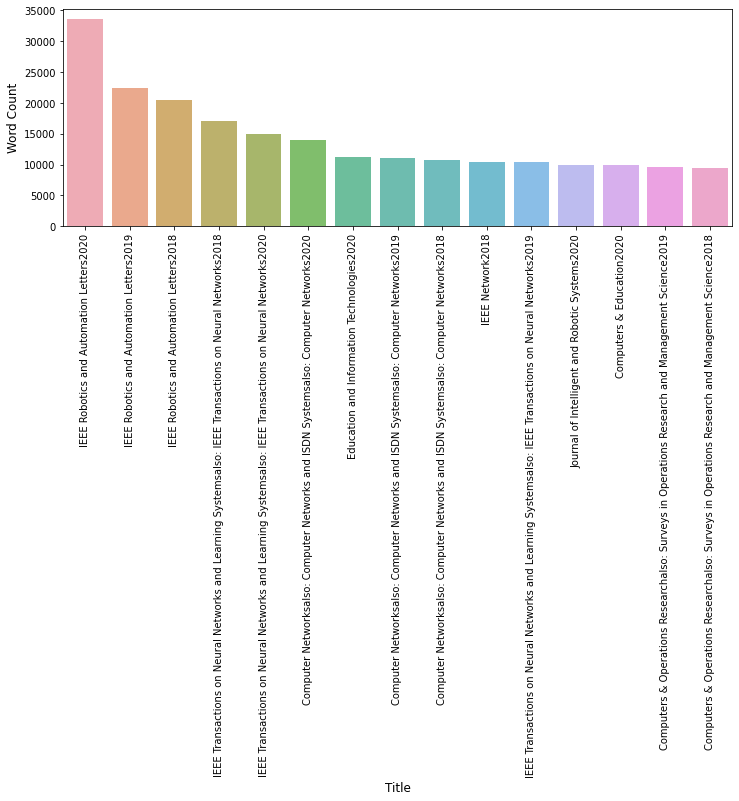

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
cnt_pro = dt['TitleYear'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(dt['TitleYear'], dt['Count'] , alpha=0.8)
plt.ylabel('Word Count', fontsize=12)
plt.xlabel('Title', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [13]:
df.head(20)

,Title,Content,Year,ImpactFactor,AcceptanceRate,Reviewtime,TitleYear,Count
0,Computers & Education,{ COMPUTERS & EDUCATİON } Headers: { Volum...,2020,3.63,0.2,4,Computers & Education2020,9846
1,Computers & Education,{ COMPUTERS & EDUCATİON } Headers: { Volume...,2019,3.63,0.2,4,Computers & Education2019,8485
2,Computers & Education,{ COMPUTERS & EDUCATİON } Headers: { Volume...,2018,3.63,0.2,4,Computers & Education2018,8900
3,Computer Science Education,{ COMPUTER SCİENCE EDUCATİON } https://dblp.u...,2020,0.80,0.2,8,Computer Science Education2020,704
4,Computer Science Education,{ COMPUTER SCİENCE EDUCATİON } https://dblp.u...,2019,0.80,0.2,8,Computer Science Education2019,732
5,Computer Science Education,{ COMPUTER SCİENCE EDUCATİON } https://dblp....,2018,0.80,0.2,8,Computer Science Education2018,810
6,Education and Information Technologies,{ EDUCATİON AND INFORMATİON TECHNOLOGİES } ht...,2020,1.65,0.2,8,Education and Information Technologies2020,11174
7,Education and Information Technologies,{ EDUCATİON AND INFORMATİON TECHNOLOGİES } ht...,2019,1.65,0.2,8,Education and Information Technologies2019,6985
8,Education and Information Technologies,{ EDUCATİON AND INFORMATİON TECHNOLOGİES } ht...,2018,1.65,0.2,8,Education and Information Technologies2018,6068
9,ACM Transactions on Computing Education,{ ACM TRANSACTİONS ON COMPUTİNG EDUCATİON (TO...,2020,0.99,0.2,8,ACM Transactions on Computing Education2020,1287


In [14]:

import re
# bs4 needs to download
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    
    # to remove numeric digits from string 
    text = ''.join([i for i in text  if not i.isdigit()])     
    
    # split into words
    from nltk.tokenize import word_tokenize
    tokens = word_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    import string
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]  
    
   
   
    # stemming of words
    from nltk.stem.porter import PorterStemmer
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in words]
    #porter.tokens.tostring();
    
    #Lemmatization
    # import these modules 
    from nltk.stem import WordNetLemmatizer 
    wn = WordNetLemmatizer()
    w = [wn.lemmatize(word) for word in stemmed]
    
    text = " ".join(w)
  #print(text)
    return text


In [15]:
import numpy as np

def loadGloveModel(File):
    print("Loading Glove Model")
    f = open(File, encoding="utf8")
  #  f = open(File,'r')
    gloveModel = {}
    for line in f:
        splitLines = line.split()
        word = splitLines[0]
        wordEmbedding = np.array([float(value) for value in splitLines[1:]])
        gloveModel[word] = wordEmbedding
    print(len(gloveModel)," words loaded!")
    return gloveModel

In [16]:
model=loadGloveModel("glove.6B/glove.6B.50d.txt")

Loading Glove Model
400000  words loaded!


In [17]:
myTitle="""User-Profile-Based Journal Recommendation System for Candidate Article: Using Customizable Objective Function and Trend Analysis 




""";
#replace
myTitle.replace(",", " ; ")
#repat 3 times 
myTreapleTitle=myTitle+myTitle+myTitle

In [18]:
myAbstract="""Finding the right journal for a manuscript to be submitted is difficult and often time-consuming because authors take into account some criterias while searching for the appropriate journal for their manuscript. The first of these is the similarity of the journal to be submitted with the content of the manuscript. For this purpose, the subject of the manuscript should be in accordance with the scope of the journal. In addition, the journal should publish papers on topics similar to this manuscript before. If recently similar publications on the subject of the manuscript appear frequently in that journal, in other words, if there is a trend for the journal on that subject, that journal has a better chance of accepting the manuscript. The other is to take into account the impact factor, acceptance rate, review time and publishing houses of the journal, which are suitable for the author's past publication profile. In this study, a novel method is proposed in which both the content of the article and the author / authors profile are considered together to find the appropriate journal. To the best of our knowledge, this is the first effort in this direction. Experimental results conducted on real data sets have shown that the proposed method is applicable and performs high accuracy values. """
#replace the comma with semicolumn
myAbstract.replace(",", " ; ")
myAbstract=myAbstract;

In [19]:
myProfile=""" Ertan Bütün;Mehmet Kaya; 2020 IEEE Trans. Cybern.
 Shalaw Mshir;Mehmet Kaya; 2020 ISDFS
 Vignesh Balasubramanian;John K.-J. Li;Dorene O'Hara;Mehmet Kaya; 2019 Comput. Biol. Medicine
 Mehmet Kaya;Vignesh Balasubramanian;Yueya Ge;John K.-J. Li; 2019 Comput. Biol. Medicine
 Mehmet Kaya;Vignesh Balasubramanian;John K.-J. Li; 2019 Comput. Biol. Medicine
 Mehmet Resul Bilginci;Gamze Ogcu Kaya;Ali Turkyilmaz; 2019 Int. J. Inf. Syst. Serv. Sect.
 Mehmet Kayaalp; 2019 AMIA
 Ahmet Anil Müngen;Emre Dogan;Mehmet Kaya; 2019 ASONAM
 Hüseyin Vural;Mehmet Kaya;Reda Alhajj; 2019 ASONAM
 Zhala Sarkawt Othman;Mehmet Kaya; 2019 ISDFS
 Mehmet Alegoz;Onur Kaya;Z. Pelin Bayindir; 2019 OR
 Mehmet Kaya;Reda Alhajj; 2019 Lecture Notes in Social Networks
 Mehmet Kaya;Vignesh Balasubramanian;Amit M. Patel;Yueya Ge;John K.-J. Li; 2018 Comput. Biol. Medicine
 John K.-J. Li;Mehmet Kaya;Peter L. M. Kerkhof; 2018 Comput. Biol. Medicine
 Hüseyin Vural;Mehmet Kaya; 2018 Comput. Biol. Medicine
 Serpil Aslan;Mehmet Kaya; 2018 Future Gener. Comput. Syst.
 Ertan Bütün;Mehmet Kaya;Reda Alhajj; 2018 Inf. Sci.
 Ahmet Anil Müngen;Mehmet Kaya; 2018 Soc. Netw. Anal. Min.
 Mehmet Kayaalp; 2018 AMIA
 Betul Bulut;Buket Kaya;Reda Alhajj;Mehmet Kaya; 2018 ASONAM
 Ayse Geckil;Ahmet Anil Mungen;Esra Gündogan;Mehmet Kaya; 2018 ASONAM
 Hüseyin Vural;Buket Kaya;Reda Alhajj;Mehmet Kaya; 2018 ASONAM"""
myProfile.replace(",", " ; ")

" Ertan Bütün;Mehmet Kaya; 2020 IEEE Trans. Cybern.\n Shalaw Mshir;Mehmet Kaya; 2020 ISDFS\n Vignesh Balasubramanian;John K.-J. Li;Dorene O'Hara;Mehmet Kaya; 2019 Comput. Biol. Medicine\n Mehmet Kaya;Vignesh Balasubramanian;Yueya Ge;John K.-J. Li; 2019 Comput. Biol. Medicine\n Mehmet Kaya;Vignesh Balasubramanian;John K.-J. Li; 2019 Comput. Biol. Medicine\n Mehmet Resul Bilginci;Gamze Ogcu Kaya;Ali Turkyilmaz; 2019 Int. J. Inf. Syst. Serv. Sect.\n Mehmet Kayaalp; 2019 AMIA\n Ahmet Anil Müngen;Emre Dogan;Mehmet Kaya; 2019 ASONAM\n Hüseyin Vural;Mehmet Kaya;Reda Alhajj; 2019 ASONAM\n Zhala Sarkawt Othman;Mehmet Kaya; 2019 ISDFS\n Mehmet Alegoz;Onur Kaya;Z. Pelin Bayindir; 2019 OR\n Mehmet Kaya;Reda Alhajj; 2019 Lecture Notes in Social Networks\n Mehmet Kaya;Vignesh Balasubramanian;Amit M. Patel;Yueya Ge;John K.-J. Li; 2018 Comput. Biol. Medicine\n John K.-J. Li;Mehmet Kaya;Peter L. M. Kerkhof; 2018 Comput. Biol. Medicine\n Hüseyin Vural;Mehmet Kaya; 2018 Comput. Biol. Medicine\n Serpil As

In [20]:
myCitation="""J. F. Burnham, “Scopus database: A review,” Biomedical Digital Libraries. 2006, doi: 10.1186/1742-5581-3-1.
N. Kang, M. Doornenbal, and B. Schijvenaars, “Elsevier journal finder: Recommending journals for your paper,” 2015, doi: 10.1145/2792838.2799663.
H. Alhoori and R. Furuta, “Recommendation of scholarly venues based on dynamic user interests,” J. Informetr., 2017, doi: 10.1016/j.joi.2017.03.006.
E. Kartal, Z. Özen, and İ. Emre, “Metin Madenciliği ile Türkçe Bir Dergi Öneri Sisteminin Geliştirilmesi,” 2018.
A. Forrester, C. Bjork, and C. Tenopir, “New web services are helping authors make data-driven decisions when choosing which journal to submit to,” Impact of Social Sciences blog, 2017. .
S. Yu et al., “PAVE: Personalized Academic Venue recommendation Exploiting co-publication networks,” J. Netw. Comput. Appl., 2018, doi: 10.1016/j.jnca.2017.12.004.
E. Medvet, A. Bartoli, and G. Piccinin, “Publication Venue Recommendation Based on Paper Abstract,” 2014, doi: 10.1109/ICTAI.2014.152.
G. M. García, B. P. Nunes, G. R. Lopes, M. A. Casanova, and L. A. P. Paes Leme, “Techniques for comparing and recommending conferences,” J. Brazilian Comput. Soc., 2017, doi: 10.1186/s13173-017-0053-z.
I. Boukhris and R. Ayachi, “A novel personalized academic venue hybrid recommender,” 2014, doi: 10.1109/CINTI.2014.7028720.
	C. S. Campbell, P. P. Maglio, A. Cozzi, and B. Dom, “Expertise identification using email communications,” 2003, doi: 10.1145/956863.956965.
	A. A. Patak, H. A. Naim, and R. Hidayat, “Taking mendeley as multimedia-based application in academic writing,” Int. J. Adv. Sci. Eng. Inf. Technol., 2016, doi: 10.18517/ijaseit.6.4.890.
	S. Jain, H. Khangarot, and S. Singh, “Journal Recommendation System Using Content-Based Filtering,” in Advances in Intelligent Systems and Computing, 2019.
	A. Bozanta and B. Kutlu, “Developing a Contextually Personalized Hybrid Recommender System,” Mob. Inf. Syst., 2018, doi: 10.1155/2018/3258916.
	X. Ren et al., “ClusCite: Effective citation recommendation by information network-based clustering,” 2014, doi: 10.1145/2623330.2623630.
	A. I. Pudovkin and E. Garfield, “Algorithmic procedure for finding semantically related journals,” J. Am. Soc. Inf. Sci. Technol., 2002, doi: 10.1002/asi.10153.
	D. Wang, Y. Liang, D. Xu, X. Feng, and R. Guan, “A content-based recommender system for computer science publications,” Knowledge-Based Syst., 2018, doi: 10.1016/j.knosys.2018.05.001.
	Q. Diao, M. Qiu, C. Y. Wu, A. J. Smola, J. Jiang, and C. Wang, “Jointly modeling aspects, ratings and sentiments for movie recommendation (JMARS),” 2014, doi: 10.1145/2623330.2623758.
	W. Qu, K. S. Song, Y. F. Zhang, S. Feng, D. L. Wang, and G. Yu, “A novel approach based on multi-view content analysis and semi-supervised enrichment for movie recommendation,” 2013, doi: 10.1007/s11390-013-1376-7.
	M. H. Chen, C. H. Teng, and P. C. Chang, “Applying artificial immune systems to collaborative filtering for movie recommendation,” Adv. Eng. Informatics, 2015, doi: 10.1016/j.aei.2015.04.005.
	X. Bai, M. Wang, I. Lee, Z. Yang, X. Kong, and F. Xia, “Scientific paper recommendation: A survey,” IEEE Access. 2019, doi: 10.1109/ACCESS.2018.2890388.
	S. T. Dumais and J. Nielsen, “Automating the assignment of submitted manuscripts to reviewers,” 1992, doi: 10.1145/133160.133205.
	K. Balog, L. Azzopardi, and M. De Rijke, “Formal models for expert finding in enterprise corpora,” 2006, doi: 10.1145/1148170.1148181.
	B. Bulut, B. Kaya, R. Alhajj, and M. Kaya, “A paper recommendation system based on user’s research interests,” 2018, doi: 10.1109/ASONAM.2018.8508313.
	“Conference Alerts Network.” conferencealerts.net (accessed Jan. 03, 2020).
	D. T. Hoang, D. Hwang, V. C. Tran, V. Du Nguyen, and N. T. Nguyen, “Academic event recommendation based on research similarity and exploring interaction between authors,” 2017, doi: 10.1109/SMC.2016.7844925.
	“An Academic Call For Papers Database.” https://www.cfplist.com/ (accessed Dec. 28, 2020).
	M. Kuhn and R. Wattenhofer, “The layered world of scientific conferences,” 2008, doi: 10.1007/978-3-540-78849-2_10.
	M. Singh, T. Chakraborty, A. Mukherjee, and P. Goyal, “Is this conference a top-tier? ConfAssist: An assistive conflict resolution framework for conference categorization,” J. Informetr., 2016, doi: 10.1016/j.joi.2016.08.001.
	S. Theiler, “Basics of Using Pre-trained GloVe Vectors in Python,” 2019. https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db#:~:text=Global Vectors for Word Representation,in a high-dimensional space.
	N. Mhirsi and I. Boukhris, “Exploring Location and Ranking for Academic Venue Recommendation,” 2018, doi: 10.1007/978-3-319-76348-4_9.
	S. Li, P. Brusilovsky, S. Su, and X. Cheng, “Conference Paper Recommendation for Academic Conferences,” IEEE Access, 2018, doi: 10.1109/ACCESS.2018.2817497.
	M. J. Schuemie and J. A. Kors, “Jane: Suggesting journals, finding experts,” Bioinformatics, 2008, doi: 10.1093/bioinformatics/btn006.

  """


In [21]:
myProfile=myTreapleTitle+myAbstract +myProfile+myCitation

In [22]:
myProfile=myTreapleTitle+myAbstract +myCitation

In [23]:
df.loc[len(df.index)] = ["MY Paper",myProfile,"2020","0.99","0.20","8","Comparing Journal Based on Year  ","zero"] 

In [24]:
df['Content']=df['Content'].apply(cleanText)

In [25]:
#Cleaned Document
df.to_csv('CleanedJournal\CleanedNormalOld2MyJournal.csv')

In [26]:
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [24]:
# Create the Document Term Matrix
data=df['Content']
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(data)

In [25]:
# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequenci
doc_term_matrix = sparse_matrix.todense()
dk = pd.DataFrame(doc_term_matrix,
 columns=count_vectorizer.get_feature_names(),
 index=df['Title'])
dk

C:\Users\Nemo\anaconda3\envs\tens\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aabid,aabloo,aad,aaeshah,aafaq,aaka,aakanksha,aakar,aakash,...,øyvind,ülkü,ülle,ümit,ümmühan,ünal,üney,ünlüyurt,ünver,μauv
Title,,,,,,,,,,,,,,,,,,,,,
Computers & Education,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Computers & Education,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Computers & Education,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Computer Science Education,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Computer Science Education,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Transactions on Mass-Data Analysis of Images and Signals,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wiley Interdisciplinary Reviews: Data Mining and Knowledge Discovery,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wiley Interdisciplinary Reviews: Data Mining and Knowledge Discovery,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(dk, dk))

[[1.         0.98318918 0.98455839 ... 0.88091022 0.87294244 0.12360611]
 [0.98318918 1.         0.98081543 ... 0.88062701 0.87283001 0.12297052]
 [0.98455839 0.98081543 1.         ... 0.88558588 0.8776384  0.12851426]
 ...
 [0.88091022 0.88062701 0.88558588 ... 1.         0.93895397 0.1241848 ]
 [0.87294244 0.87283001 0.8776384  ... 0.93895397 1.         0.11815728]
 [0.12360611 0.12297052 0.12851426 ... 0.1241848  0.11815728 1.        ]]


In [27]:
similarity=cosine_similarity(dk, dk)

In [28]:
#Get the count of row
rowCount=df.shape[0]-1

In [35]:
#print last colum similiarity
print(similarity[rowCount]*100)

[ 12.36061105  12.29705155  12.8514262   10.29539671  10.78168505
  11.59884706  13.03142753  13.06787069  12.35804355  13.24576325
  11.91756992   5.9768019   13.77257742  12.86356626  13.09427744
  13.0651071   14.24341895  11.7637556   11.27635687   9.08815668
  12.41171161  14.57330203  12.63999447  12.93692473  11.50121056
  11.03233028  10.6946667   13.18774108  12.50230785  11.20335344
  13.85977923  12.38003123  11.69994686  13.26964118  13.71635925
  13.31753425  13.56340157   1.23063898  12.99539034  13.2494955
  12.32326761  12.22860038  13.95851357  12.88073578  12.88726783
  12.73879434  12.69424834  12.69318268  14.09645351  12.2395086
  11.10952995  12.64565166  12.32754288  11.64410259  13.25995035
  13.54496078  13.85798391  11.30357794  12.49017963  11.77807054
  12.41368542  12.53157431  12.29744735  12.98916872  13.73309045
  13.25196095  13.01237317  12.25236201  13.18091683  11.27516866
  10.70136141  11.17050914  12.25129699  12.85593392  12.98896878
  12.2636110

C:\Users\Nemo\anaconda3\envs\tens\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


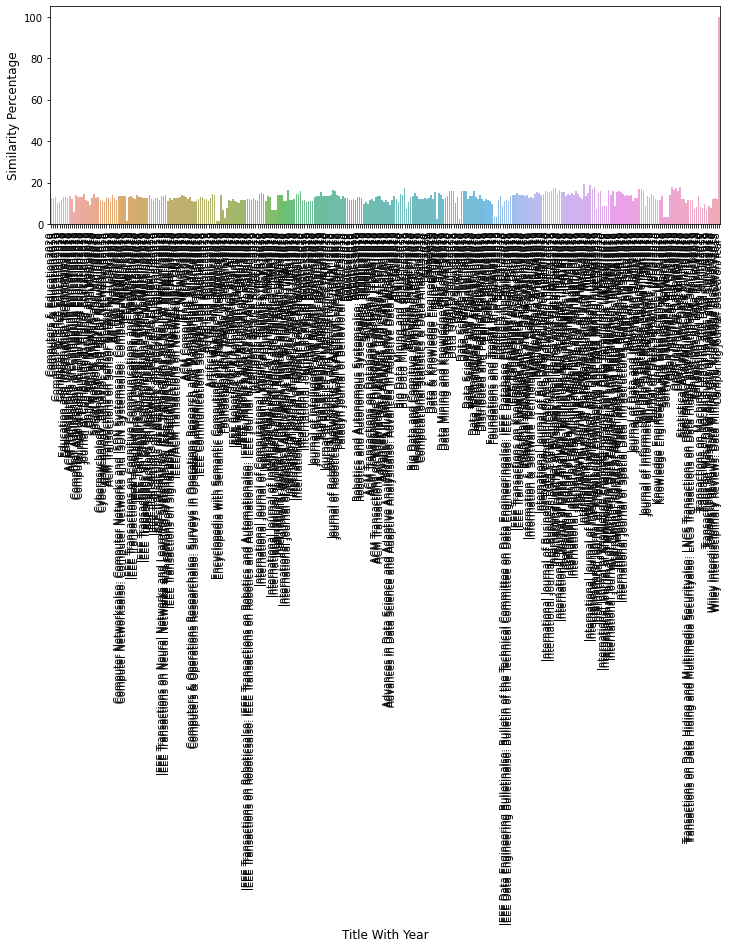

In [36]:
#draw a bar graph
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
sns.barplot(df['TitleYear'],  similarity[rowCount]*100, alpha=0.8)
plt.ylabel('Similarity Percentage', fontsize=12)
plt.xlabel('Title With Year', fontsize=12)
plt.xticks(rotation=90)
 
plt.show();


In [37]:
#DataFrame Journal
column_names = ["Title","Similarity","ImpactFactor","AcceptanceRate","Reviewtime","ObjectiveFunction"]#Title,Content,Year,ImpactFactor,AcceptanceRate,Reviewtime

dataJournal = pd.DataFrame(columns = column_names)

#For loop
for ind in  range(0,22,1):
    #print(df['Title'][ind], df['Year'][ind]) 
    k=ind*3;    
    score2020= similarity[rowCount][k]*100
    score2019= similarity[rowCount][k+1]*100
    score2018= similarity[rowCount][k+2]*100
    ort=(score2020*5+score2019*3+score2018*1)/9
    objectiveFun=ort*30+df['ImpactFactor'][k]*5+(100/df['Reviewtime'][k])*5+df['AcceptanceRate'][k]*10
        
    dataJournal.loc[len(dataJournal.index)] = [df['Title'][ind*3],ort,df['ImpactFactor'][ind*3],df['AcceptanceRate'][ind*3],df['Reviewtime'][ind*3],objectiveFun]

In [38]:
#top 10
dataJournal.sort_values(by=['Similarity'], ascending=False).head(15)

,Title,Similarity,ImpactFactor,AcceptanceRate,Reviewtime,ObjectiveFunction
7,Social Network Analysis and Mining,13.747046,2.97,0.2,8,491.761394
14,IEEE Transactions on Control of Network Systems,13.480227,6.11,0.2,8,499.456810
11,Computer Networksalso: Computer Networks and I...,13.423869,7.26,0.2,8,503.516060
18,IEEE Transactions on Neural Networks and Learn...,13.421402,16.17,0.2,8,547.992060
4,Computer Applications in Engineering Education,13.394207,0.33,0.2,8,467.976211
5,Journal of Computing in Higher Education,13.313283,0.66,0.2,8,467.198493
21,IET Networks,13.266342,1.49,0.2,8,469.940253
16,IEEE Transactions on Network Science and Engin...,13.145591,5.61,0.2,8,486.917744
10,Ad Hoc Networks,13.126549,6.11,0.2,8,488.846456
2,Education and Information Technologies,12.968755,1.65,0.2,8,461.812644


C:\Users\Nemo\anaconda3\envs\tens\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


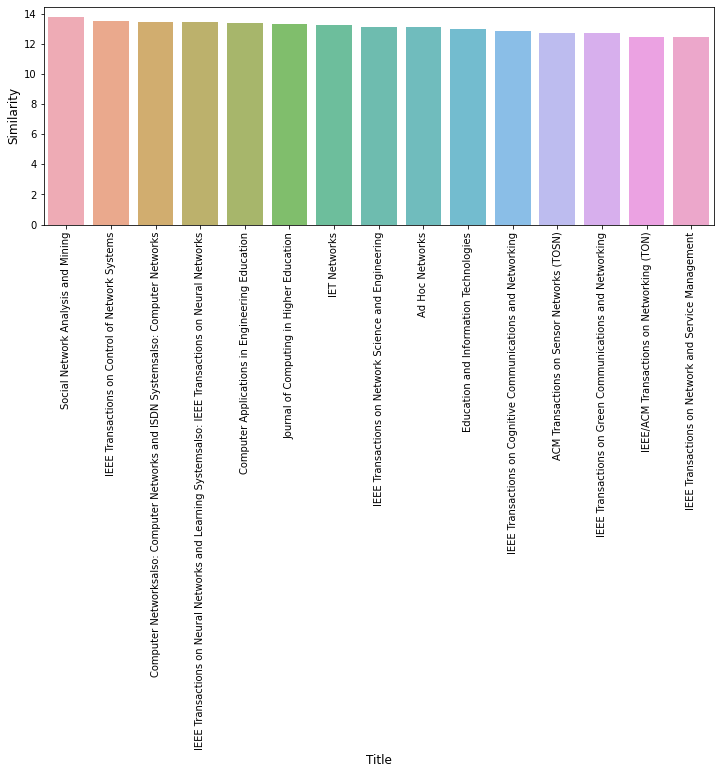

In [33]:
dt=dataJournal.sort_values(by=['Similarity'], ascending=False).head(15)
import seaborn as sns
import matplotlib.pyplot as plt
#cnt_pro = dt['Title'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(dt['Title'], dt['Similarity'] , alpha=0.8)
plt.ylabel('Similarity', fontsize=12)
plt.xlabel('Title', fontsize=12)
plt.xticks(rotation=90)
plt.show();



In [34]:
dataJournal.sort_values(by=['ObjectiveFunction'], ascending=False,)

,Title,Similarity,ImpactFactor,AcceptanceRate,Reviewtime,ObjectiveFunction
18,IEEE Transactions on Neural Networks and Learn...,13.421402,16.17,0.2,8,547.992060
0,Computers & Education,12.393960,3.63,0.2,4,516.968787
11,Computer Networksalso: Computer Networks and I...,13.423869,7.26,0.2,8,503.516060
14,IEEE Transactions on Control of Network Systems,13.480227,6.11,0.2,8,499.456810
7,Social Network Analysis and Mining,13.747046,2.97,0.2,8,491.761394
20,IEEE/ACM Transactions on Networking (TON),12.440066,10.39,0.2,8,489.651991
10,Ad Hoc Networks,13.126549,6.11,0.2,8,488.846456
16,IEEE Transactions on Network Science and Engin...,13.145591,5.61,0.2,8,486.917744
15,IEEE Transactions on Green Communications and ...,12.718878,6.76,0.2,8,479.866331
13,IEEE Transactions on Cognitive Communications ...,12.827320,4.46,0.2,8,471.619602


C:\Users\Nemo\anaconda3\envs\tens\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


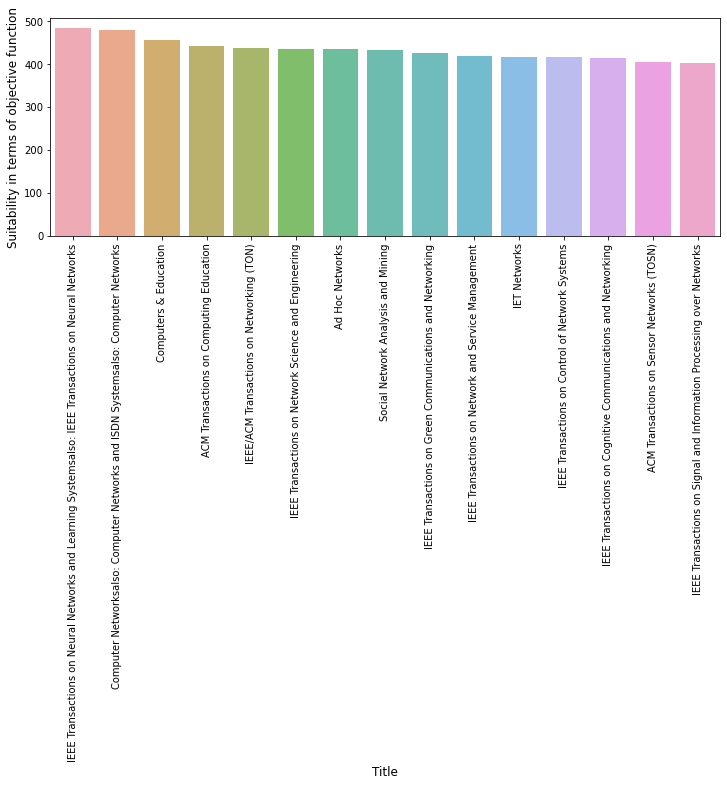

In [34]:
dt=dataJournal.sort_values(by=['ObjectiveFunction'], ascending=False).head(15)
import seaborn as sns
import matplotlib.pyplot as plt
#cnt_pro = dt['Title'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(dt['Title'], dt['ObjectiveFunction'] , alpha=0.8)
plt.ylabel('Suitability in terms of objective function', fontsize=12)
plt.xlabel('Title', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [35]:
import ipywidgets as widgets
import tensorflow as tf
print(tf.__version__)


2.3.0


In [36]:
import ipywidgets as widgets

#from IPython.display import display

 #objectiveFun=ort*3+df['ImpactFactor'][ind*3]*3*3+(100/df['Reviewtime'][ind*3])*3*3+df['AcceptanceRate'][ind*3]*10*3
print("Please select the coefficients of the objective function to find suitable journal")
simil=widgets.IntSlider(
    min=1,
    max=51,
    step=5,
    description='Similarity:',
    value=30
)
impactF=widgets.IntSlider(
    min=0,
    max=10,
    step=1,
    description='ImpactFactor',
    value=5
)
accptRate=widgets.IntSlider(
    min=0,
    max=10,
    step=1,
    description='Acceptance:',
    value=5
)
reviewTime=widgets.IntSlider(
    min=0,
    max=10,
    step=1,
    description='Review Time:',
    value=0
)
 #DataFrame Journal
column_names = ["Title","Similarity","ImpactFactor","AcceptanceRate","Reviewtime","ObjectiveFunction"]#Title,Content,Year,ImpactFactor,AcceptanceRate,Reviewtime
costumJ = pd.DataFrame(columns = column_names)

btn = widgets.Button(description='Calculate Again')
def Calculate(b):
    print("Starting to Calculate:...")
    #clear all data
   # costumJ.iloc[0:0]#df.drop(df.index, inplace=True)
    costumJ.drop(costumJ.index, inplace=True)
    #For loop
    for ind in  range(0,22,1):
    #print(df['Title'][ind], df['Year'][ind]) 
        k=ind*3;
    
        score2020= similarity[rowCount][k]*100
        score2019= similarity[rowCount][k+1]*100
        score2018= similarity[rowCount][k+2]*100
        ort=(score2020*5+score2019*3+score2018*1)/9
        objectiveFun=ort*simil.value+df['ImpactFactor'][k]*impactF.value+(100/df['Reviewtime'][k])*reviewTime.value+df['AcceptanceRate'][k]*accptRate.value
        costumJ.loc[len(costumJ.index)] = [df['Title'][k],ort,df['ImpactFactor'][k],df['AcceptanceRate'][k],df['Reviewtime'][k],objectiveFun]
       
    display(costumJ.sort_values(by=['ObjectiveFunction'], ascending=False))
    #print(costumJ)

btn.on_click(Calculate)    

 
display(simil)
display(impactF)
display(accptRate)
display(reviewTime)
display(btn)

Please select the coefficients of the objective function to find suitable journal


IntSlider(value=30, description='Similarity:', max=51, min=1, step=5)

IntSlider(value=5, description='ImpactFactor', max=10)

IntSlider(value=5, description='Acceptance:', max=10)

IntSlider(value=0, description='Review Time:', max=10)

Button(description='Calculate Again', style=ButtonStyle())

Starting to Calculate:...


,Title,Similarity,ImpactFactor,AcceptanceRate,Reviewtime,ObjectiveFunction
18,IEEE Transactions on Neural Networks and Learn...,11.216910,16.17,0.2,8,418.357301
11,Computer Networksalso: Computer Networks and I...,12.580259,7.26,0.2,8,414.707757
3,ACM Transactions on Computing Education,12.349298,0.99,0.2,8,376.428931
20,IEEE/ACM Transactions on Networking (TON),10.654412,10.39,0.2,8,372.582358
16,IEEE Transactions on Network Science and Engin...,11.415449,5.61,0.2,8,371.513470
10,Ad Hoc Networks,11.273947,6.11,0.2,8,369.768411
7,Social Network Analysis and Mining,11.741355,2.97,0.2,8,368.090642
15,IEEE Transactions on Green Communications and ...,10.863682,6.76,0.2,8,360.710450
17,IEEE Transactions on Network and Service Manag...,10.679763,6.43,0.2,8,353.542889
21,IET Networks,11.436964,1.49,0.2,8,351.558906
